In [1]:
import sys
import os
from dotenv import load_dotenv
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../databases')))
from connections.database_connector import DatabaseConnection
from data_loader.teleco_data_loader import TelecoDataLoader
from cleaning.data_cleaning import DataCleaner
from engagement_analysis.user_engagement_analysis import UserEngagementAnalysis
from engagement_analysis.telecom_engagement_analysis import TelecomEngagementAnalysis
from experience_analytics.aggregate_customer import AggregateCustomer
from experience_analytics.network_parameter_analyzer import NetworkParameterAnalyzer
from experience_analytics.distribution_analysis import DistributionAnalysis
load_dotenv()

True

In [2]:
#  Initialize and connect to the database
db_connection = DatabaseConnection(
    db_name=os.getenv('DB_NAME'),
    user=os.getenv('DB_USER'),
    password=os.getenv('DB_PASSWORD'),
    host=os.getenv('DB_HOST'),
    port=os.getenv('DB_PORT')
)
db_connection.connect()

Connection to PostgreSQL DB successful


In [3]:
# Initialize the TelecoDataLoader object with the database connection
data_loader = TelecoDataLoader(db_connection=db_connection)

# Load the data into a pandas DataFrame
df = data_loader.load_data("xdr_data")
# df = pd.DataFrame(data)

# print(df.head())

# df.info()
# Close the database connection when done
db_connection.close()

/mnt/d/tutorial/10x/tasks/task_2/customer-insights-analytics/src/data_loader/teleco_data_loader.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Connection closed.


In [4]:
aggregate_customer = AggregateCustomer(df)
aggregate_customer.run_analysis().head()
# aggregate_customer.aggregate_per_customer()

,IMSI,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Manufacturer,Handset Type
0,2.040471e+14,109.795706,17.662883,2.080991e+07,759658.664811,2.0,0.0,Quectel Wireless Solutions Co Ltd,Quectel Wireless. Quectel Ec21-E
1,2.040808e+14,109.795706,17.662883,2.080991e+07,759658.664811,1.0,0.0,Quectel Wireless Solutions Co Ltd,Quectel Wireless. Quectel Ec25-E
2,2.082001e+14,287.000000,16.000000,2.697000e+03,759658.664811,87.0,22.0,Dn Electronics,Dn Electronics Danew Konnect 350
3,2.082001e+14,82.000000,2.000000,9.107000e+03,18872.000000,627.0,127.0,Samsung,Samsung Galaxy Grand (Gt-I9060X)
4,2.082001e+14,87.000000,5.000000,2.080991e+07,759658.664811,38.0,42.5,Apple,Apple iPhone 6S (A1688)


In [5]:
# Initialize the DataCleaner object with the DataFrame
data_cleaner = DataCleaner(df)

# Clean the data
data_cleaner.clean_data()  # No need to assign, as it modifies df in place

#change kbs and bytes to mb
data_cleaner.convert_units_to_mb()

# Handle missing values and outliers
data_cleaner.handle_missing_and_outliers()

# Access the cleaned DataFrame
cleaned_df = data_cleaner.df

columns_in_bytes:  ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
columns_in_kb:  ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)']
Unit conversion complete: Bytes and kbps columns converted to MB.
Missing values and outliers treated.


In [6]:
analyzer = NetworkParameterAnalyzer(cleaned_df)
tcp_stats = analyzer.compute_tcp_stats()
analyzer.print_stats("TCP Retransmission", tcp_stats)



TCP Retransmission Stats:
Top 10: [91.73592602 91.602627   91.341315   91.064793   91.04984    91.021394
 90.98636    90.961985   90.902995   90.788153  ]
Bottom 10: [8.60e-05 9.70e-05 1.06e-04 1.08e-04 1.13e-04 1.28e-04 1.29e-04 1.34e-04
 1.34e-04 1.43e-04]
Most Frequent 10: [21.56957294 20.81120827  0.76098866 20.81124427 21.65412517  0.75969666
 20.81123227  0.75975066  0.76231866  0.76097666]


Average Throughput per Handset Type:
                                           Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1386  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1387                          Zyxel Communicat. Lte7460   
1388                          Zyxel Communicat. Sbg3600   
1389                    Zyxel Communicat. Zyxel Wah7706   
1390                                          undefined   

      Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  
0                    2.898000                 0.040750  
1                    0.815875                 0.021500  
2                    1.064375                 0.052750  
3                    6.958

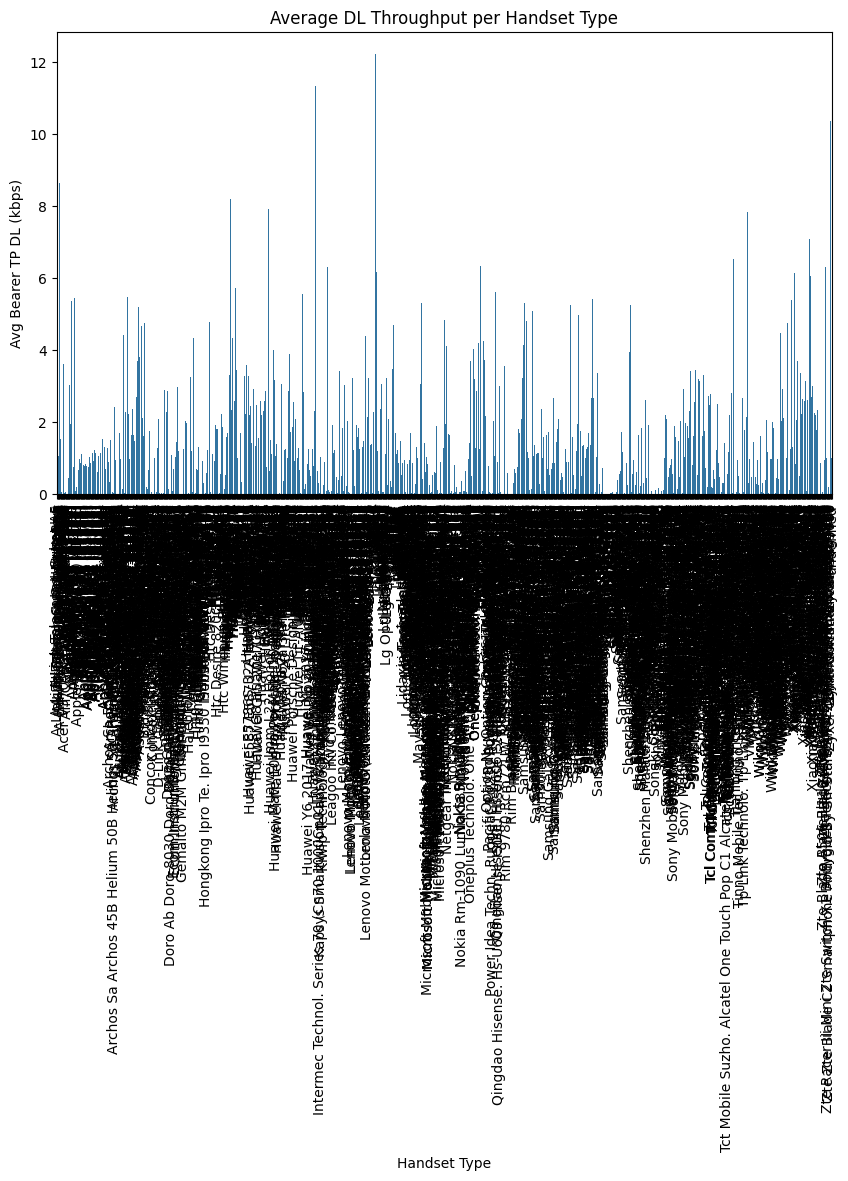

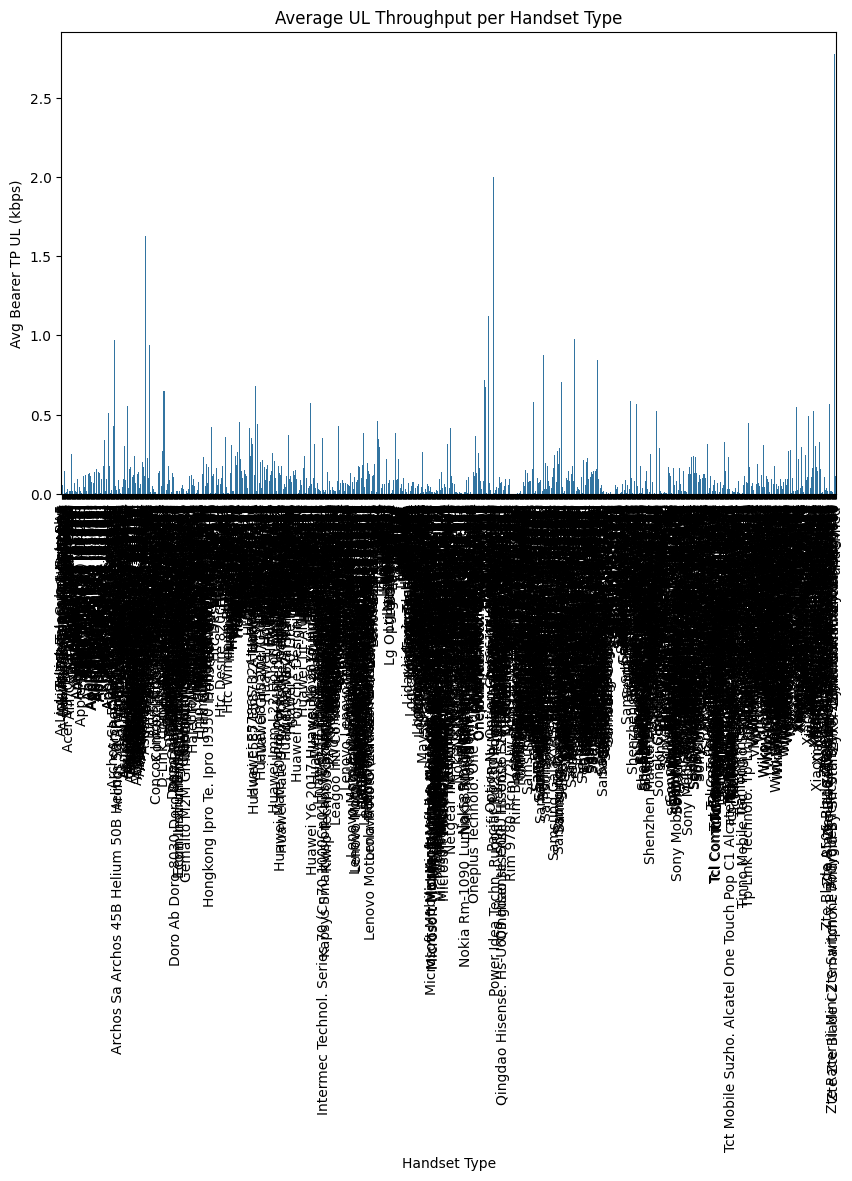

Average TCP Retransmission per Handset Type:
                                           Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1386  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1387                          Zyxel Communicat. Lte7460   
1388                          Zyxel Communicat. Sbg3600   
1389                    Zyxel Communicat. Zyxel Wah7706   
1390                                          undefined   

      TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  
0                       20.809914                     0.759659  
1                        0.602349                     0.013864  
2                       41.344479                  

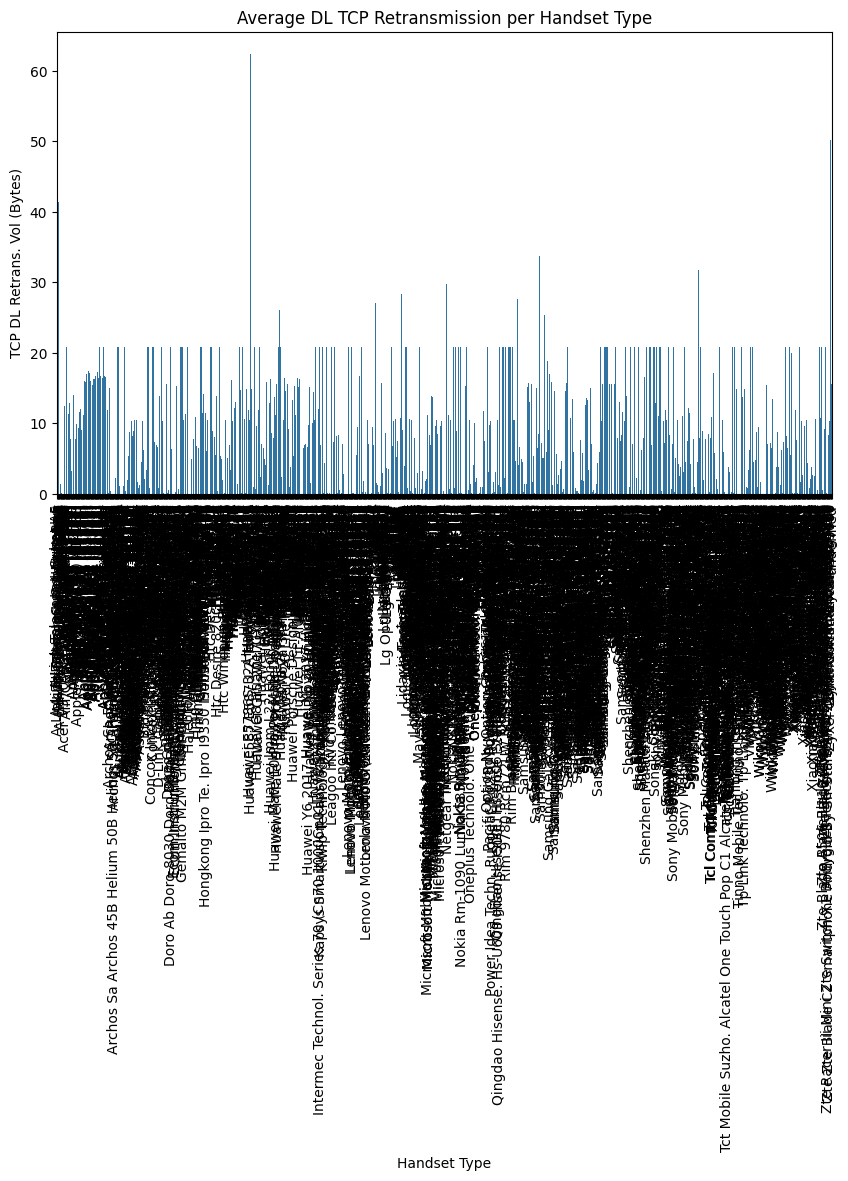

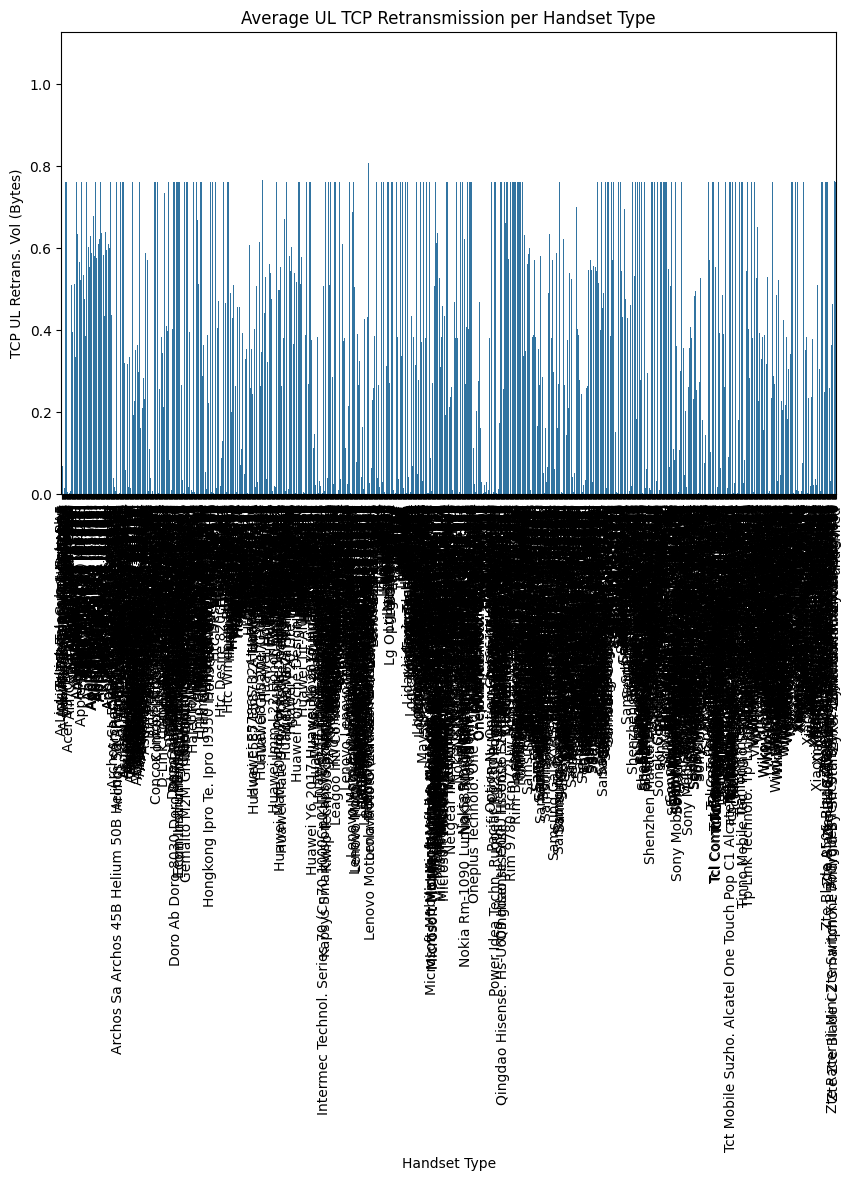

In [8]:
distribution_analysis = DistributionAnalysis(cleaned_df)
distribution_analysis.generate_report()